In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d yasserh/amazon-product-reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/amazon-product-reviews-dataset
License(s): CC0-1.0
100% 708k/708k [00:00<00:00, 1.01MB/s]
100% 708k/708k [00:00<00:00, 1.01MB/s]


In [ ]:
!unzip /content/amazon-product-reviews-dataset.zip

Archive:  /content/amazon-product-reviews-dataset.zip
  inflating: 7817_1.csv              


In [ ]:
!pip install watermark
!pip install vaderSentiment
!pip install imbalanced-learn

In [ ]:
!pip install datasets

In [ ]:
import re
import unicodedata
import itertools
from datasets import Dataset

import pandas as pd
import numpy as np
import pandas

import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


nltk.download('punkt')

nltk.download('stopwords')

sns.set_theme(style='whitegrid')
palette='viridis'

import warnings
warnings.filterwarnings("ignore")

import watermark


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/drive/MyDrive/ml_project/7817_1.csv")



In [ ]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,NaN,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,NaN,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,NaN,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,NaN,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,NaN,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
df.tail()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-07-06T00:00:00.000Z,NaN,9.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-06-22T00:00:00.000Z,NaN,41.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-03-31T00:00:00.000Z,NaN,34.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-04-26T00:00:00Z,NaN,7.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces
1596,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-07-31T00:00:00Z,NaN,10.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I ordered this item to replace the one that no...,I am sending all of this crap back to amazon a...,NaN,NaN,DIANE K,NaN,NaN,4 ounces


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [ ]:
df.dtypes

,0
id,object
asins,object
brand,object
categories,object
colors,object
dateAdded,object
dateUpdated,object
dimension,object
ean,float64
keys,object


In [ ]:
df.shape

(1597, 27)

In [ ]:
data = df.copy()

In [ ]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [ ]:
# Remove columns that have any NaN value
df = df.dropna(axis=1)

# Check remaining columns after removal
print("Remaining columns after removing columns with NaN:")
print(df.isnull().sum())

Remaining columns after removing columns with NaN:
id                    0
asins                 0
brand                 0
categories            0
dateAdded             0
dateUpdated           0
keys                  0
name                  0
prices                0
reviews.sourceURLs    0
reviews.text          0
dtype: int64


In [ ]:
%%time

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


nltk.download('punkt')

nltk.download('stopwords')

stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)
        text = re.sub(r'@\w+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

df['Cleaned_Review'] = df['reviews.text'].apply(clean_text)

df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_text)

df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)

df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 4.51 s, sys: 18.1 ms, total: 4.53 s
Wall time: 4.55 s


,id,asins,brand,categories,dateAdded,dateUpdated,keys,name,prices,reviews.sourceURLs,reviews.text,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy..."
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read..."
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire..."
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con..."
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti..."


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()


def get_sentiment(review):
    return analyzer.polarity_scores(review)

df['vader_scores'] = df['Cleaned_Review'].apply(get_sentiment)

df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)

print(df[['Cleaned_Review', 'compound', 'sentiment']].tail(10))

                                         Cleaned_Review  compound sentiment
1587  i am now having to order my third remote becau...    0.5349  Positive
1588  dont bother paying for one or getting a replac...    0.1777  Positive
1589  ive had the replacement remote 3 months and it...    0.1531  Positive
1590  voice remote gave out nearly a year after i pu...    0.6914  Positive
1591  purchased my first one with the tv fire box ov...    0.8119  Positive
1592  this is not the same remote that i got for my ...   -0.6249  Negative
1593  i have had to change the batteries in this rem...   -0.9205  Negative
1594  remote did not activate nor did it connect to ...   -0.8126  Negative
1595  it does the job but is super over priced i fee...    0.8271  Positive
1596  i ordered this item to replace the one that no...   -0.8630  Negative


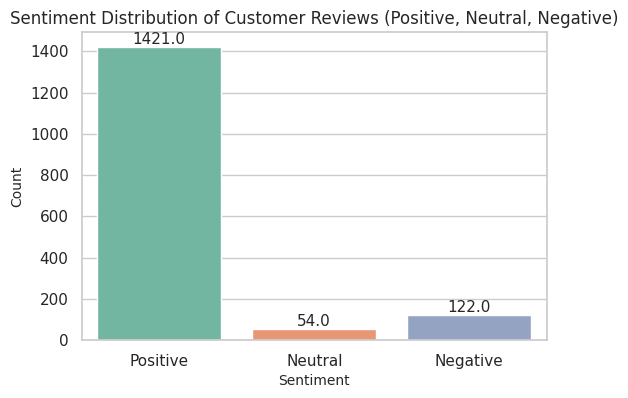

In [ ]:
plt.figure(figsize=(6, 4))


sns.countplot(data=df, x='sentiment', palette='Set2')


plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=12)
plt.xlabel('Sentiment', fontsize=10)
plt.ylabel('Count', fontsize=10)


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=11)
plt.show()

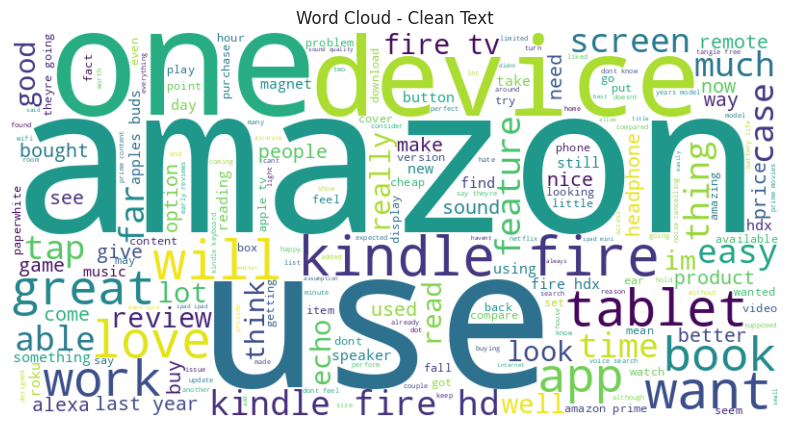

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(' '.join(df['Cleaned_Review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Clean Text")
plt.show()

(-0.5, 999.5, 599.5, -0.5)

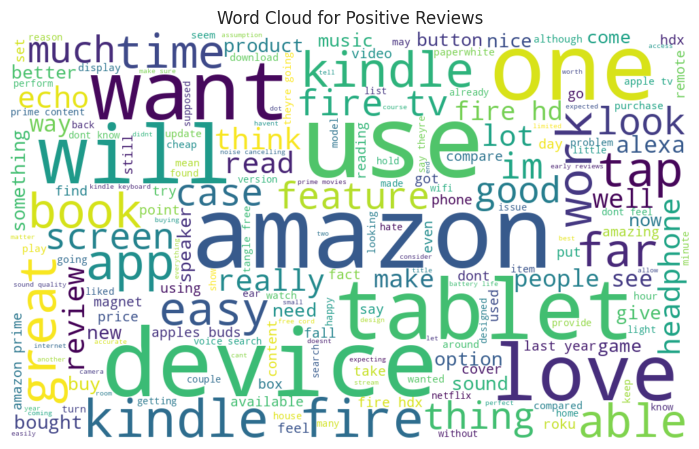

In [ ]:

positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['Cleaned_Review'].tolist())
neutral_reviews = " ".join(df[df['sentiment'] == 'Neutral']['Cleaned_Review'].tolist())
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['Cleaned_Review'].tolist())

wordcloud_positive = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(positive_reviews)
wordcloud_neutral = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(neutral_reviews)
wordcloud_negative = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(negative_reviews)

plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=12)
plt.axis('off')







(-0.5, 999.5, 599.5, -0.5)

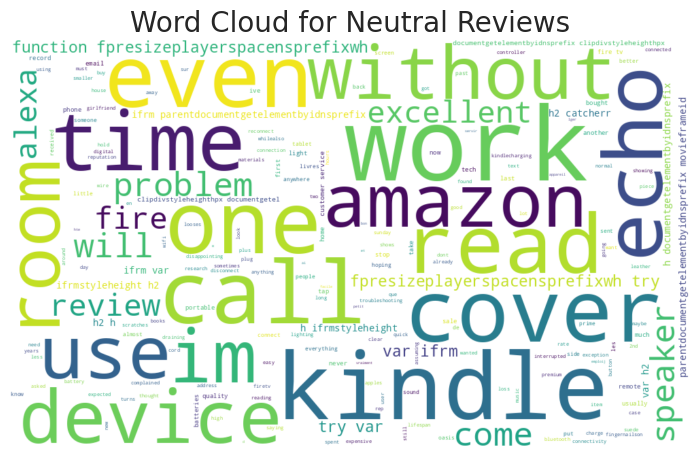

In [ ]:

plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews', fontsize=20)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

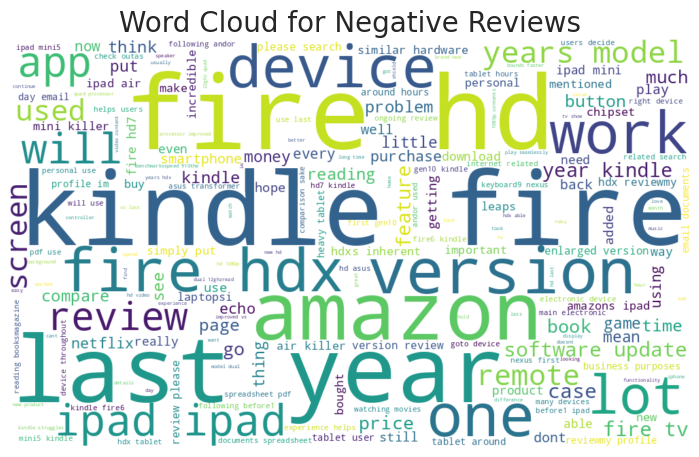

In [ ]:

plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=20)
plt.axis('off')

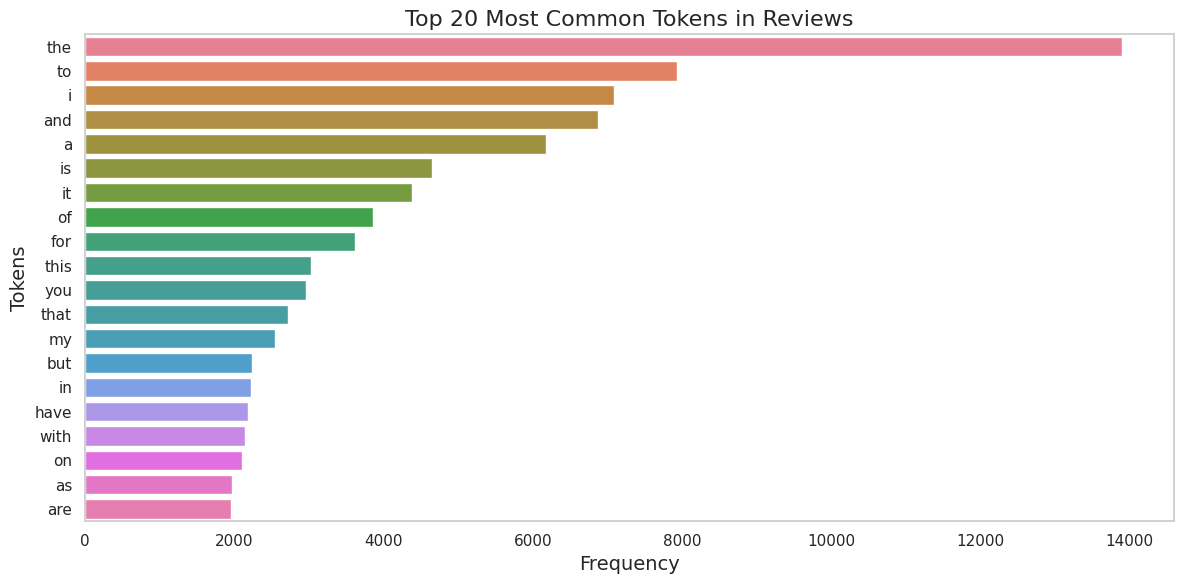

In [ ]:
from collections import Counter

# Combine all tokens into a single list
all_tokens = [token for tokens in df['Tokenized_Review'] for token in tokens]

# Count the frequency of tokens
token_counts = Counter(all_tokens)

# Get the top 20 most common tokens
common_tokens = token_counts.most_common(20)  # Limiting to top 20

# Separate tokens and their frequencies
tokens, frequencies = zip(*common_tokens)

# Create a bar plot for the most frequent tokens
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(tokens), palette='husl')  # Changed palette

# Improved title and axis labels
plt.title('Top 20 Most Common Tokens in Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Tokens', fontsize=14)

# Add gridlines for easier reading of bar heights
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Ensure layout is clean and labels fit well
plt.grid(False)
plt.show()

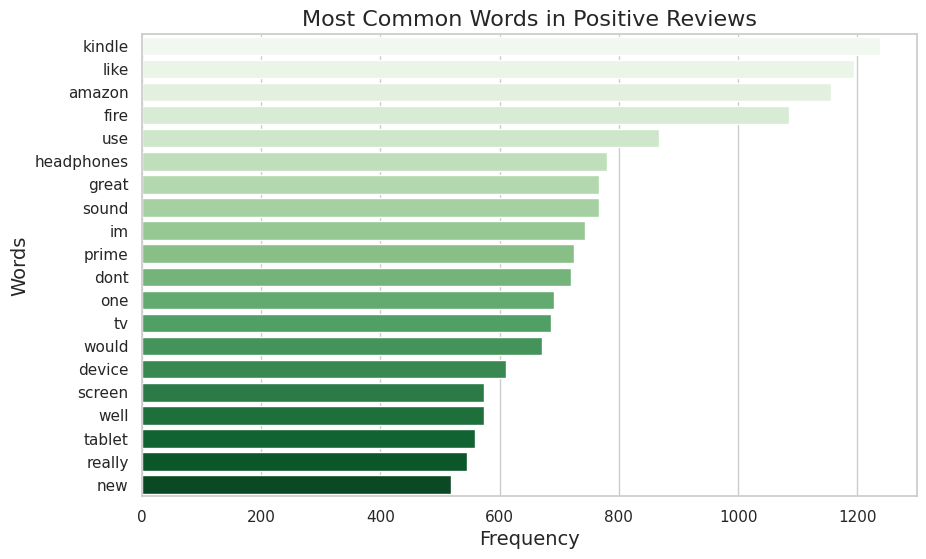

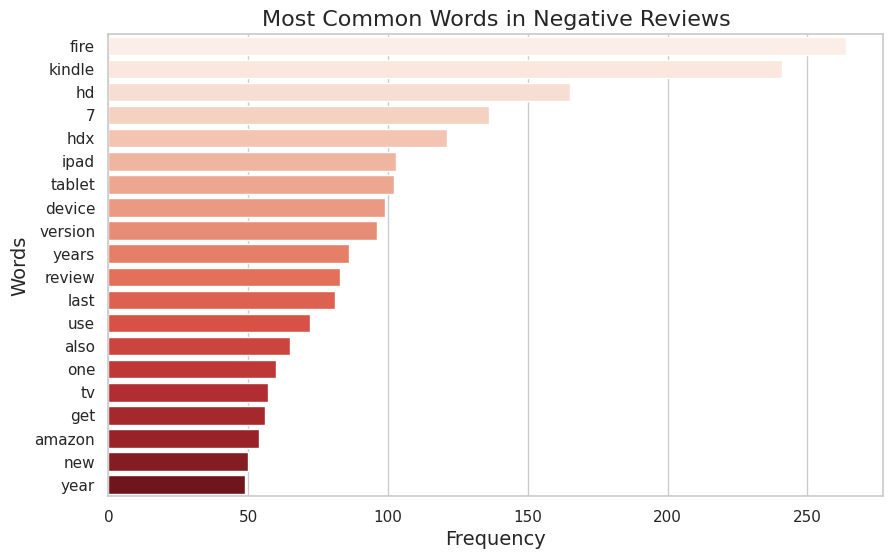

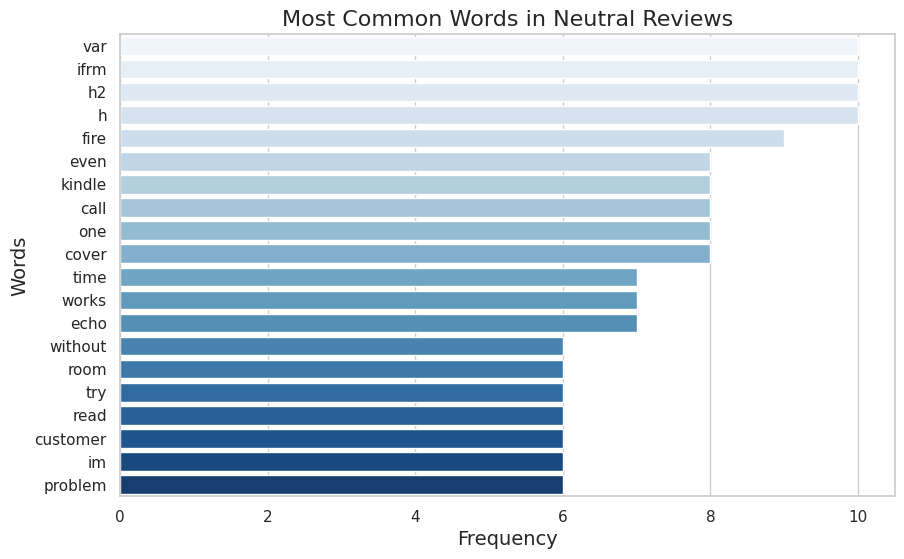

In [ ]:
from collections import Counter

# Function to plot the most common words for each sentiment
def plot_most_common_words(common_words, sentiment, color):
    # Unzip the common_words tuple into two lists: words and their respective counts
    words, counts = zip(*common_words)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette=color)

    # Set the title and axis labels
    plt.title(f'Most Common Words in {sentiment} Reviews', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)

    # Display the chart
    plt.show()

# Generate the most common words for each sentiment

# Filter reviews based on sentiment
positive_reviews = df[df['sentiment'] == 'Positive']['No_Stopwords_Review']
negative_reviews = df[df['sentiment'] == 'Negative']['No_Stopwords_Review']
neutral_reviews = df[df['sentiment'] == 'Neutral']['No_Stopwords_Review']

# Combine all words into a single list for each sentiment
positive_words_list = [word for review in positive_reviews for word in review]
negative_words_list = [word for review in negative_reviews for word in review]
neutral_words_list = [word for review in neutral_reviews for word in review]

# Count the most common words in each sentiment's word list
positive_words = Counter(positive_words_list).most_common(20)
negative_words = Counter(negative_words_list).most_common(20)
neutral_words = Counter(neutral_words_list).most_common(20)

# Plot the most common words for Positive sentiment
plot_most_common_words(positive_words, 'Positive', 'Greens')

# Plot the most common words for Negative sentiment
plot_most_common_words(negative_words, 'Negative', 'Reds')

# Plot the most common words for Neutral sentiment
plot_most_common_words(neutral_words, 'Neutral', 'Blues')

In [ ]:
# Deleting unwanted columns
df = df.drop(columns=['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'keys', 'name', 'prices', 'vader_scores', 'reviews.sourceURLs'])

df.head()

,reviews.text,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review,compound,sentiment
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy...",0.9879,Positive
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read...",0.9881,Positive
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire...",0.4364,Positive
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con...",0.9746,Positive
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti...",0.9980,Positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Training and testing division
X = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])
y = df['sentiment']

tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

le

LabelEncoder()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Viewing rows and columns given by X train", X_train.shape)

print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (1277, 5000)
Viewing rows and columns given y train (1277,)


In [ ]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [ ]:
!pip install catboost


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Models to be evaluated
models = [
            # Naive Bayes Model (requires dense matrix)
            GaussianNB(),

            # Decision Tree Model
            DecisionTreeClassifier(random_state=42),

            # Random forest model
            RandomForestClassifier(n_estimators=100, random_state=42),

            # Logistic regression model
            LogisticRegression(random_state=50),

            # XGBoost Model (can use sparse matrix)
            XGBClassifier(tree_method='gpu_hist', random_state=42),

            # K-Nearest Neighbors Model
            KNeighborsClassifier(n_neighbors=13), ]

# Evaluate each model
for i, model in enumerate(models):
    # For GaussianNB (requires dense matrix)
    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
    else:
        # For all other models
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.9671
Testing Accuracy: 0.8844
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8844
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9187
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.9178
Testing Accuracy: 0.9062
-----------------
Model 5: XGBClassifier
Training Accuracy: 0.8927
Testing Accuracy: 0.8781
-----------------
Model 6: KNeighborsClassifier
Training Accuracy: 0.9076
Testing Accuracy: 0.8938
-----------------


Model 1: GaussianNB
Training Accuracy: 0.9671104150352389
Testing Accuracy: 0.884375

Confusion matrix for Model 1: GaussianNB 

 [[ 12   0  19]
 [  0   2   6]
 [ 11   1 269]]


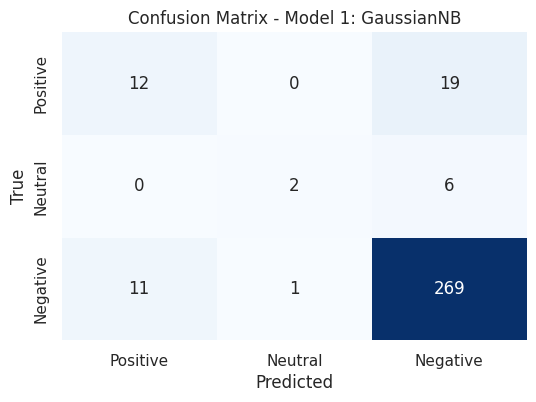

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.884375

Confusion matrix for Model 2: DecisionTreeClassifier 

 [[ 14   1  16]
 [  1   3   4]
 [  5  10 266]]


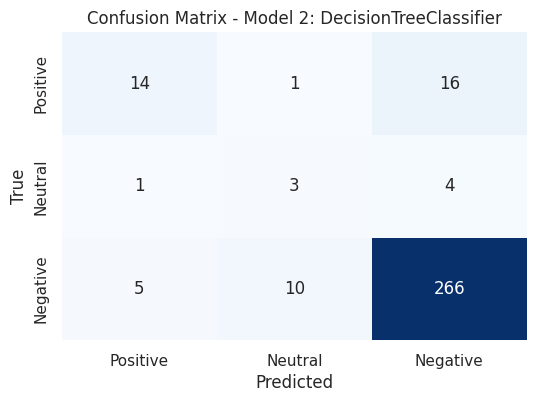

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.91875

Confusion matrix for Model 3: RandomForestClassifier 

 [[ 11   0  20]
 [  0   2   6]
 [  0   0 281]]


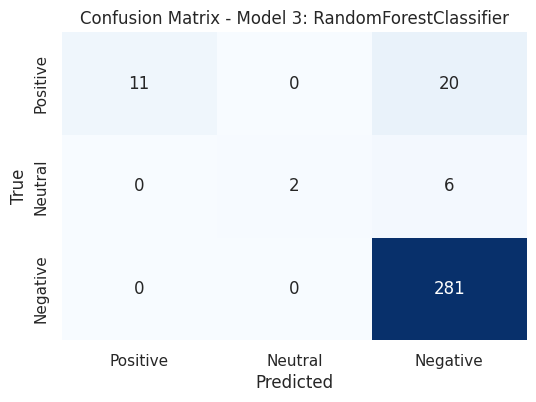

------------------
Model 4: LogisticRegression
Training Accuracy: 0.9177760375880971
Testing Accuracy: 0.90625

Confusion matrix for Model 4: LogisticRegression 

 [[  7   0  24]
 [  0   2   6]
 [  0   0 281]]


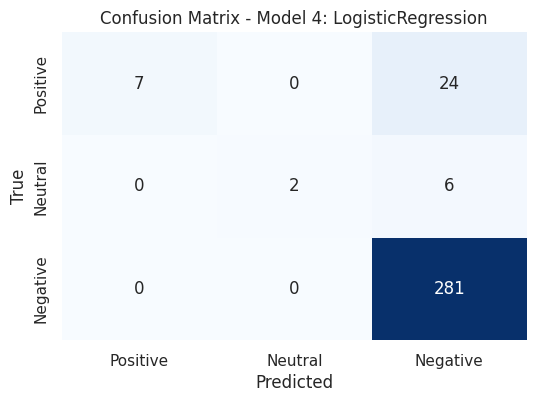

------------------
Model 5: XGBClassifier
Training Accuracy: 0.8927173061863743
Testing Accuracy: 0.878125

Confusion matrix for Model 5: XGBClassifier 

 [[  0   0  31]
 [  0   0   8]
 [  0   0 281]]


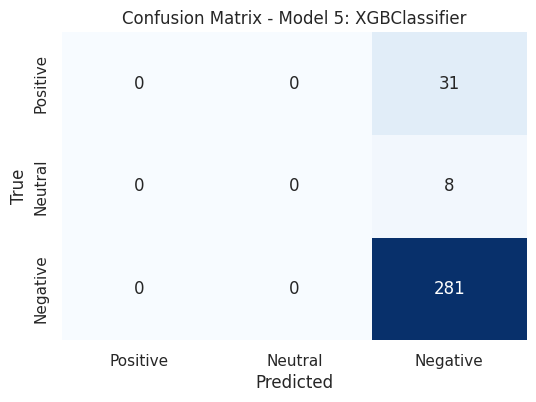

------------------
Model 6: KNeighborsClassifier
Training Accuracy: 0.9075959279561472
Testing Accuracy: 0.89375

Confusion matrix for Model 6: KNeighborsClassifier 

 [[  6   0  25]
 [  1   1   6]
 [  2   0 279]]


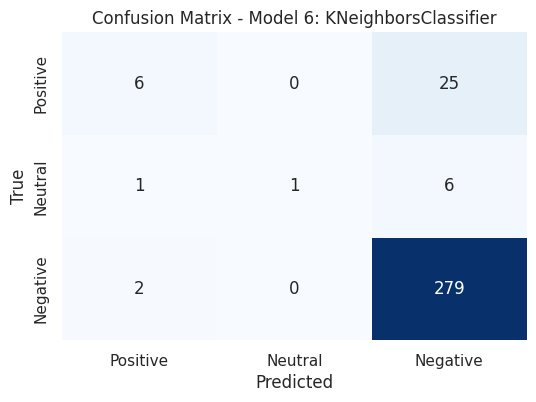

------------------


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

# Define your sentiment labels
labels = ['Positive',
          'Neutral',
          'Negative']

# Convert your TF-IDF sparse matrix to a dense matrix for models that require dense input
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Evaluate each model
for i, model in enumerate(models):
    # Check if the model requires dense data (like GaussianNB)
    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    print(f'Confusion matrix for Model {i+1}: {type(model).__name__} \n\n', cm)

    # Plot the confusion matrix with annotations for three classes
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)

    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()

    print("------------------")

In [ ]:
# Define sentiment labels (assuming 3-class classification)
sentiment_labels = ['Positive', 'Neutral', 'Negative']

# Convert sparse matrix to dense for models that require dense input
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42, max_iter=1000),
          XGBClassifier(random_state=42),
]


# Evaluate each model
for i, model in enumerate(models):

    print(f"Model {i+1}: {type(model).__name__}")

    # For models that require dense matrices
    if isinstance(model, (GaussianNB, KNeighborsClassifier)):
        model.fit(X_train_dense, y_train)
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
    else:
        # For models that work with sparse matrices
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate classification report with sentiment labels
    report = classification_report(y_test, y_test_pred, target_names=sentiment_labels)
    print()
    print("Classification Report:")
    print(report)
    print("=======================================")

Model 1: GaussianNB
Training Accuracy: 0.9671104150352389
Testing Accuracy: 0.884375

Classification Report:
              precision    recall  f1-score   support

    Positive       0.52      0.39      0.44        31
     Neutral       0.67      0.25      0.36         8
    Negative       0.91      0.96      0.94       281

    accuracy                           0.88       320
   macro avg       0.70      0.53      0.58       320
weighted avg       0.87      0.88      0.87       320

Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.884375

Classification Report:
              precision    recall  f1-score   support

    Positive       0.70      0.45      0.55        31
     Neutral       0.21      0.38      0.27         8
    Negative       0.93      0.95      0.94       281

    accuracy                           0.88       320
   macro avg       0.61      0.59      0.59       320
weighted avg       0.89      0.88      0.88       320

Model 3: KNeighborsClas

In [ ]:
# Convert sparse matrix to dense for models that require dense input
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced'),
          LogisticRegression(random_state=42, max_iter=1000),
          XGBClassifier(random_state=42),]



metricas = []


for model in models:
    print(f"Evaluating {type(model).__name__}")

    # For models that require dense matrices
    if isinstance(model, (GaussianNB, KNeighborsClassifier)):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
        report = classification_report(y_test, model.predict(X_test_dense), output_dict=True)
    else:
        # For models that work with sparse matrices
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        report = classification_report(y_test, model.predict(X_test), output_dict=True)

    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']}
    metricas.append(metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

Evaluating GaussianNB
Evaluating DecisionTreeClassifier
Evaluating KNeighborsClassifier
Evaluating RandomForestClassifier
Evaluating LogisticRegression
Evaluating XGBClassifier


,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.884375,0.870665,0.884375,0.873766,320.000000
1,DecisionTreeClassifier,0.884375,0.889887,0.884375,0.883924,320.000000
2,KNeighborsClassifier,0.903125,0.893504,0.903125,0.885766,320.000000
3,RandomForestClassifier,0.918750,0.925631,0.918750,0.900040,320.000000
4,LogisticRegression,0.906250,0.915293,0.906250,0.879316,320.000000
5,XGBClassifier,0.925000,0.921430,0.925000,0.912840,320.000000


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sample data: you can replace this with your actual DataFrame
data = {
    'Cleaned_Review': [
        "This product is amazing! I love it so much.",
        "This is the worst product I have ever used. Completely disappointing.",
        "The product is okay, not too bad, not too good."
    ]
}

df = pd.DataFrame(data)


analyzer = SentimentIntensityAnalyzer()

def get_sentiment(review):
    return analyzer.polarity_scores(review)

df['vader_scores'] = df['Cleaned_Review'].apply(get_sentiment)

df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

def classify_sentiment(compound_score):

    if -0.05 <= compound_score <= 0.05:
        return 'Neutral'
    elif compound_score > 0.05:
        return 'Positive'
    else:
        return 'Negative'


df['sentiment'] = df['compound'].apply(classify_sentiment)

for index, row in df.iterrows():
    print(f"Sample Review: {row['Cleaned_Review']}")
    print(f"VADER Scores: {row['vader_scores']}")
    print(f"Predicted Sentiment: {row['sentiment']}\n")


Sample Review: This product is amazing! I love it so much.
VADER Scores: {'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.8516}
Predicted Sentiment: Positive

Sample Review: This is the worst product I have ever used. Completely disappointing.
VADER Scores: {'neg': 0.458, 'neu': 0.542, 'pos': 0.0, 'compound': -0.8221}
Predicted Sentiment: Negative

Sample Review: The product is okay, not too bad, not too good.
VADER Scores: {'neg': 0.17, 'neu': 0.494, 'pos': 0.336, 'compound': 0.3278}
Predicted Sentiment: Positive

